## 용어 설명

### hand crafted feature

머신러닝에서 각 feature들의 특징들을 어떻게 추출하는지?,

 즉 사람이 추출하기 때문에 hand crafted feature라는 말이 붙었다.

### End-to-End

딥러닝에서 input과 output만 나오기 때문에 End to End라는 말이 나왔다.

### Scale invariance

스케일이 변할 떄도 객체나 이미지가 변하지 않는다.

### Non-Maximum Supperssion

각 객체의 Bounding box가 가진 score중에 가장 높은 score만을 남기고 전부 제거하는 방식




## Object Detection

CNN(Convolutional Neural Network) 모델이 하는 일은 이미지를 classification(분류) 하는 것이 목표이다.

그래서 어떤 이미지가 들어오면 해당 이미지 내의 객체들이 무엇인지 알려주었는데, Object Detection에서는 classification 뿐만 아니라 localization이라는 개념도 포함되어있습니다.

Object Detection = classification + localization

즉, 객체가 있다고 판단되어 지는 지점에 직사각형(bounding box)를 그려주어서 객체를 탐지하는 방법이다.

<img src = 'https://hoya012.github.io/assets/img/object_detection_first/fig1_cv_task.PNG'>

## Object Detection VS Classification

Image Classification

image를 타겟으로 하는 확률 값이 추출된다.

<img src = 'https://hoya012.github.io/assets/img/object_detection_first/fig2_classification_example.PNG'>

Object Detection

Classification task에 사물의 위치를 Bounding Box로 예측하는 Regression task가 추가된 문제.

<img src = 'https://hoya012.github.io/assets/img/object_detection_first/fig3_detection_example.PNG'>

## Sliding Window

Sliding Window 기법은 딥러닝 이전에 가장 자주 사용되던 방법으로, 다양한 scale의 window를 이미지의 왼쪽 위부터 오른쪽 아래까지 sliding 하며 score를 계산하는 방식

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTF3lS5MSIoVBK0_WQlX9IBN3Ge3R_Lo1iYg&usqp=CAU'>



## 왜 사진을 resize를 시키는가? 어떤 의미가 있을까?

왼쪽부터 사진을 계속해서 축소시키고 window size를 동일하다고 가정을 했을 때, 추출되는 feature의 특성을 나타낸 것입니다.

왼쪽의 경우 window size에서는 특징을 알아 채지 못하게 선만 표시 되어 있지만,

 가장 오른쪽의 경우 높은 확률로 특징을 추출할 수 있습니다.

<img src = 'https://miro.medium.com/max/700/1*LlRAQHT0ktl_33VUnDhoIg.png'>

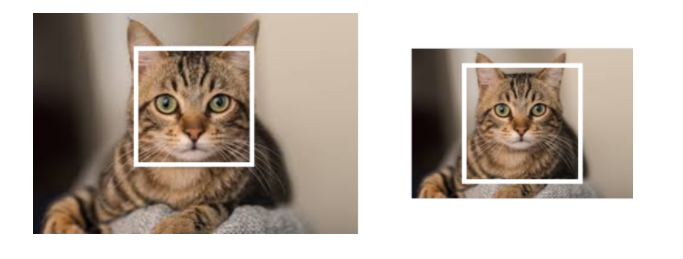




## FPN(Feature Pyramid Network)

Feature Pyramid Network는 각 사진을 resize를 한 이후 bottom-up 방식과 
top-down방식을 통해서 각 resize마다의 특성을 나타내게 만든 모델입니다.

(a) Featureized image pyramid

데이터를 resize를 시킨 이후에 CNN모델을 각 resize 데이터마다 구동하여 시간과 메모리가 너무 많이 소모된다는 단점이 있습니다.

(b) Single feature map

순전파를 이용해서 마지막의 데이터만을 가지고 predict 하기 때문에 밑에 있는 많은 정보들이 사라집니다.

즉, 고해상도에 있는 작은 물체들이 예측이 잘 안될 수 있습니다.

(c) Pyramid feature hierarchy

SSD논문에서 나온 Pyramid Feature Hierarchy는 맨위의 feature map과 맨 아래의 feature map 간의 차이가 존재하게 되고 object detection에 방해가 된다고 논문에서는 얘기하고 있습니다.


<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc5D2i4%2FbtqEfqUaK1s%2Fk5kgInuWo7qu1ik0IP6Tz1%2Fimg.png'>

FPN방법은 bottom-up 방식과 top-down방식이 함께 사용된다.

bottom-up : 원래의 데이터를 Conv를 진행하여 위로 올라갈수록 데이터의 사이즈를 0.5배를 해주어 각각의 feature map을 만들게 됩니다.

top-down : 각각 만든 feature map을 가지고 위에서 부터 차례차례 특성을 밑으로 전달해 주면서 pyramid feature hierarchy에서 지적되던 차이를 메꿔줍니다.


<img src = 'https://seongkyun.github.io/assets/post_img/papers/2019-12-06-fpn/fig6.png'>


위의 계층에서 X2를 한 데이터와 밑의 계층의 1 X 1 Conv를 한 부분을 더해서 하나의 데이터를 만들어 줍니다.

그러나 위의 feature map과 밑에 있는 feature map의 size가 차이가 나는데 어떻게 +를 해줄 수 있을까?

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbtQ3BG%2FbtqZhgwB3IM%2FoBcGxmD8ij3Zhtzddt7PSk%2Fimg.png'>

### Upsampling nearest

밑의 사진을 보시면, 1,2,3,4로 되어있는 행렬을 옆의 행렬처럼 만들어 주는 것을 의미합니다.


<img src = 'https://kharshit.github.io/img/upsampling1.png'>


여기서 모든 Channel을 256으로 맞춰주는데 이유는 계산하기 편리하게 하기 위해서 라고 합니다.

그리고 각 feature map을 3 X 3 Conv를 사용하여 최종 feature map을 만들고 그것을 맨 밑의 데이터를 기준으로 upsampling을 진행하고 쌓아서 최종 channel인 512를 만들어 줍니다.




<img src = 'https://ichi.pro/assets/images/max/724/1*cYACJ_ftbfWzQpMrIEvEcg.jpeg'>

### 아직 더 공부가 필요한 부분

### Faster RCNN에서 사용했을 때

RPN(Region Proposal Network)와 ROI(Region of Interest)를 이용한다.

input image를 FPN방식을 통하여 Feature map을 만들어 주고 RPN에 넣어서 Regions를 만들어 줍니다.

<img src = 'https://www.researchgate.net/profile/Rayson-Laroca/publication/334888304/figure/fig3/AS:787430688964609@1564749514544/Faster-R-CNN-FPN-architecture-overview.png'>

출처 : https://www.youtube.com/watch?v=r3U9MJslg5g
